In [1]:
from ot_simple_connector.connector import Connector
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

ModuleNotFoundError: No module named 'ot_simple_connector'

In [2]:
pads_cache_filename = 'c:\\tmp\\pads.csv'
pads_df = None
try:
    pads_df = pd.read_csv(pads_cache_filename)
except:
    pass

if pads_df is None:
    conn = Connector(host="192.168.4.65", port='80', user="admin", password="12345678")
    query = '| __read__ path=oms_with_dns_v7'
    job = conn.jobs.create(query_text=query, cache_ttl=60, tws=0, twf=0)
    print(job.status)
    res = job.dataset.load()
    pads_df = pd.DataFrame(res)
    pads_df.to_csv(pads_cache_filename)
pads_df


NameError: name 'Connector' is not defined

In [3]:
pads_df.dtypes

Unnamed: 0      int64
IDMestor        int64
IDPad           int64
padNum         object
IDGzu         float64
IDWell        float64
wellNum        object
IDWellNag     float64
IDVrb         float64
IDPlast        object
IDOis         float64
IDBaspro       object
DNS            object
IDKs          float64
dtype: object

In [4]:
pl_cache_filename = 'c:\\tmp\\pipelines.csv'
full_df = None
try:
    full_df = pd.read_csv(pl_cache_filename)
except:
    pass

if full_df is None:
#     schema_id = 1750000002
    conn = Connector(host="192.168.4.65", port='80', user="admin", password="12345678")
    query = '| __read__ path=pipeline/pipeline'
#     query +='| where schema_id={schema_id}'
    job = conn.jobs.create(query_text=query, cache_ttl=60, tws=0, twf=0)
    print(job.status)
    res = job.dataset.load()
    full_df = pd.DataFrame(res)
    full_df.to_csv(pl_cache_filename)
full_df

,Unnamed: 0,rs_schema_id,schema_id,pipeline_id,part_id,node_id_end,node_id_start,L,simple_part_id,node_name_start,...,thread_number,pipe_material,cover_ext,pipeline_type,placing,creation_date,mestor_name,schema_name,rs_schema_name,cover_int
0,0,1750001220,1750001202,1750003540,1750011472,1750009882,1750009878,16179.0,1750012996,задв. №146,...,1,сталь 20А,Полилен 40-ЛИ-63 + праймер НК-50,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
1,1,1750001220,1750001202,1750003540,1750004260,1750009129,1750009876,812.0,1750004674,"т.в.з.№164,165",...,1,Ст.В20СП,Пленка НКПЭЛ-63,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
2,2,1750001220,1750001202,1750003540,1750031482,1750009878,1750035084,2688.0,1750037290,задв. 155,...,1,Ст.В20СП,Пленка НКПЭЛ-63,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
3,3,1750001220,1750001202,1750003540,1750004270,1750035084,1750009129,500.0,1750004684,задв. 158,...,2,сталь 09Г2С,Пленка НКПЭЛ-63,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
4,4,1750001220,1750001202,1750003540,1750004293,1750009881,1750009880,2430.0,1750004712,вр. задв.№141,...,1,Ст.В20,Праймер,Все трубопроводы транспортирующие нефть,ДНС-1 Покамасовская,1117696511000,Покамасовское,"ННП ОАО ""СН-МНГ""",ННП Покамасовское м/р,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12033,12033,1750000386,1750000386,1750007321,1750015475,1750003592,1750000108,85.0,1750017561,к.42,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN
12034,12034,1750000386,1750000386,1750007321,1750006258,1750003395,1750000293,115.0,1750006951,к.41,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN
12035,12035,1750000386,1750000386,1750007321,1750006062,1750035068,1750035042,535.0,1750006699,т.вр.к.41,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN
12036,12036,1750000386,1750000386,1750007321,1750006062,1750010344,1750035068,1623.0,1750028972,т.вр.к.155,...,1,сталь 20С,NaN,Все трубопроводы транспортирующие воду,КНС-6 Ватинская,1302263557000,Ватинское,ВВД Ватинское м/р КНС-6,ВВД Ватинское м/р КНС-6,NaN


In [5]:
full_df.columns

Index(['Unnamed: 0', 'rs_schema_id', 'schema_id', 'pipeline_id', 'part_id',
       'node_id_end', 'node_id_start', 'L', 'simple_part_id',
       'node_name_start', 'altitude_start', 'node_type_start', 'X_start',
       'Y_start', 'node_name_end', 'altitude_end', 'node_type_end', 'X_end',
       'Y_end', 'D', 'S', 'thread_number', 'pipe_material', 'cover_ext',
       'pipeline_type', 'placing', 'creation_date', 'mestor_name',
       'schema_name', 'rs_schema_name', 'cover_int'],
      dtype='object')

In [6]:
full_df['node_name_start'] = full_df['node_name_start'].apply(str.strip)
full_df['node_name_end'] = full_df['node_name_end'].apply(str.strip)

In [7]:
t = tuple(full_df.pipeline_type.unique())
type_o, type_w, type_g = t
t

('Все трубопроводы транспортирующие нефть ',
 'Все трубопроводы транспортирующие воду ',
 'Все трубопроводы транспортирующие газ ')

In [8]:
full_df.mestor_name.unique()

array(['Покамасовское', 'Западно-Асомкинское', 'Ватинское', 'Чистинное',
       'Южно-Аганское', 'Аганское', 'Тайлаковское', 'Северо-Покурское',
       'Западно-Усть-Балыкское', 'Северо-Островное', 'Мегионское',
       'Ново-Покурское', 'Восточно-Охтеурское', 'Аригольское', 'Ининское',
       'Луговое', 'Кетовское', 'Северо-Ореховское', 'Ачимовское',
       'Мыхпайское', 'Узунское', 'Южно-Покамасовское', 'Островное',
       'Южно-Островное', 'Кысомское'], dtype=object)

In [9]:
schema_df = full_df[full_df.pipeline_type=='Все трубопроводы транспортирующие воду ']
schema_df = schema_df[schema_df.mestor_name=='Тайлаковское']
schema_df.schema_id.unique()

array([1750000936, 1750000996, 1750000976, 1750000710, 1750000610,
       1750000894], dtype=int64)

In [10]:
rs_ids = schema_df.rs_schema_id.unique()
rs_ids

array([1750000936, 1750000996, 1751002071, 1750001935, 1751002131,
       1750000610, 1750000894, 1750000710, 1750000976], dtype=int64)

In [11]:
for _id in schema_df.schema_id.unique():
    mask = full_df.schema_id == _id
    if len(full_df[mask].mestor_name.unique()) != 1:
        assert False, 'unexpected water pipeline shared between oilfields!'

rs_id: 1750000936


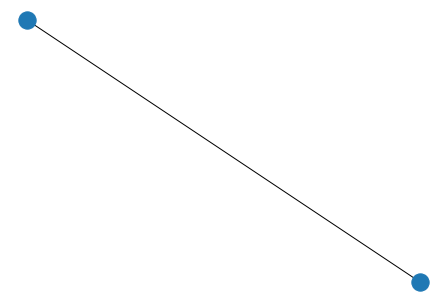

rs_id: 1750000996


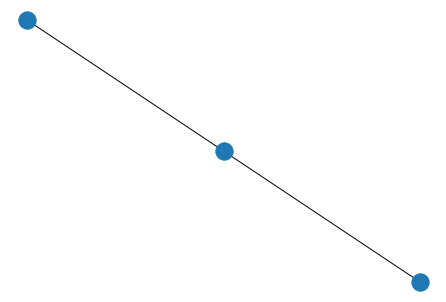

rs_id: 1751002071


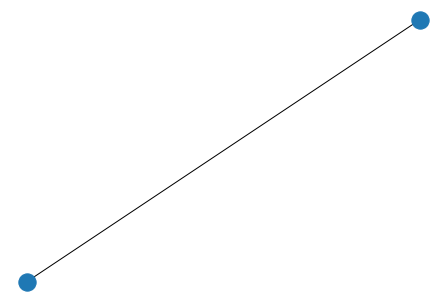

rs_id: 1750001935


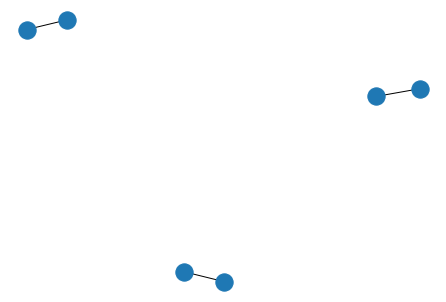

rs_id: 1751002131


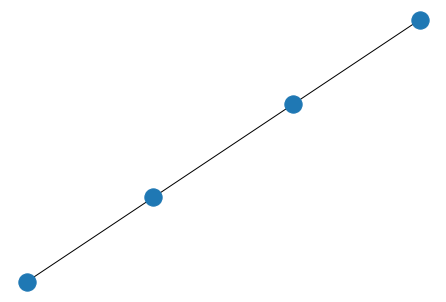

rs_id: 1750000610


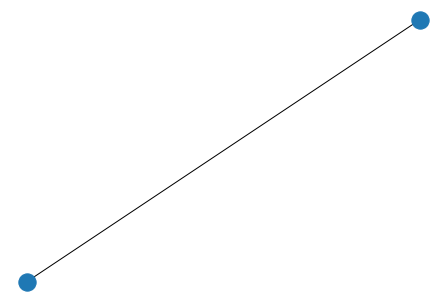

rs_id: 1750000894


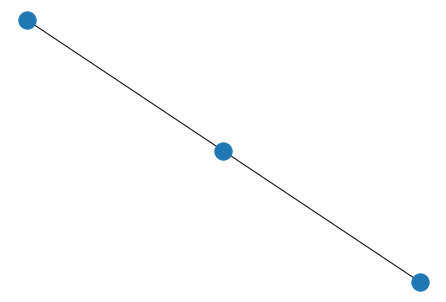

rs_id: 1750000710


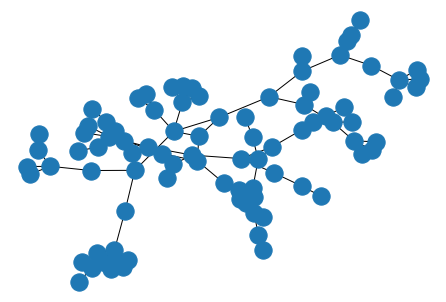

rs_id: 1750000976


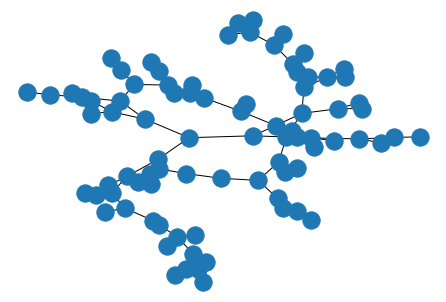

In [12]:
for rs_id in rs_ids:
    print('rs_id:', rs_id)
    graph_df = schema_df[schema_df.rs_schema_id == rs_id]
    graph_df = graph_df[["node_id_start", "node_id_end", ]]
    graph_df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(graph_df)
    nx.draw(G)
    plt.show()

rs_id: 1751002131


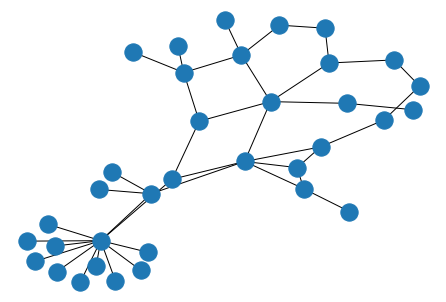

rs_id: 1750000610


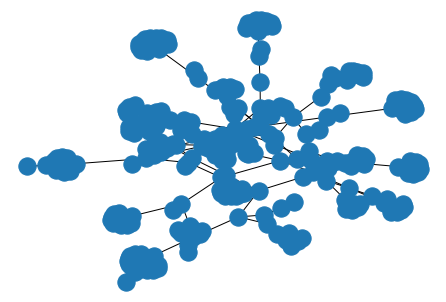

rs_id: 1750000894


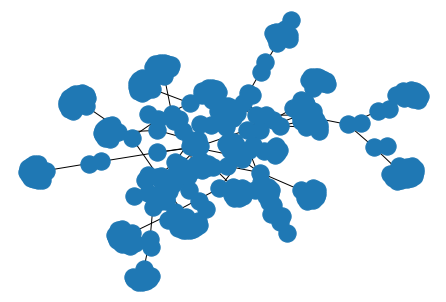

In [13]:
for rs_id in [1751002131, 1750000610, 1750000894]:
    print('rs_id:', rs_id)
    graph_df = full_df[full_df.rs_schema_id == rs_id]
    graph_df = graph_df[["node_id_start", "node_id_end", ]]
    graph_df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(graph_df)
    nx.draw(G)
    plt.show()

In [14]:
# tai_water_df = pd.concat([rs_id, len(full_df[full_df.rs_schema_id == rs_id]) for rs_id in rs_ids])
# tai_water_df.shape 
l = [(rs_id, len(full_df[full_df.rs_schema_id == rs_id])) for rs_id in rs_ids]
print(l)


[(1750000936, 1), (1750000996, 2), (1751002071, 1), (1750001935, 3), (1751002131, 43), (1750000610, 329), (1750000894, 360), (1750000710, 90), (1750000976, 88)]


In [15]:
l = [(rs_id, len(schema_df[schema_df.rs_schema_id == rs_id])) for rs_id in rs_ids]
print(l)

[(1750000936, 1), (1750000996, 2), (1751002071, 1), (1750001935, 3), (1751002131, 3), (1750000610, 1), (1750000894, 2), (1750000710, 90), (1750000976, 88)]


In [16]:
l = [(rs_id, full_df[full_df.rs_schema_id == rs_id].pipeline_type.unique()) for rs_id in rs_ids]
for item in l: print(item)

(1750000936, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1750000996, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1751002071, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1750001935, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1751002131, array(['Все трубопроводы транспортирующие нефть ',
       'Все трубопроводы транспортирующие воду '], dtype=object))
(1750000610, array(['Все трубопроводы транспортирующие нефть ',
       'Все трубопроводы транспортирующие воду '], dtype=object))
(1750000894, array(['Все трубопроводы транспортирующие нефть ',
       'Все трубопроводы транспортирующие воду '], dtype=object))
(1750000710, array(['Все трубопроводы транспортирующие воду '], dtype=object))
(1750000976, array(['Все трубопроводы транспортирующие воду '], dtype=object))


In [17]:
rs_ids = [1751002131, 1750000610, 1750000894]
rs_id = 1750000894
df = full_df[full_df.rs_schema_id == rs_id]
df = df[df.pipeline_type == type_w]
# df = df[['node_id_end', 'node_id_start']]
node_list = list(set(df.node_id_end.unique()) | set(df.node_id_start.unique()))
df2 = pd.concat([full_df[(full_df.node_id_end==n_id) | (full_df.node_id_start==n_id)] for n_id in node_list])
df2 = df2[df2.rs_schema_id == rs_id]
df2[['rs_schema_id','node_id_end', 'node_id_start', 'node_name_start', 'node_name_end', 'pipeline_type']].drop_duplicates()

,rs_schema_id,node_id_end,node_id_start,node_name_start,node_name_end,pipeline_type
10176,1750000894,1750022281,1750023653,скв.4221,к.59,Все трубопроводы транспортирующие нефть
10201,1750000894,1750022281,1750023514,скв.4181,к.59,Все трубопроводы транспортирующие нефть
10204,1750000894,1750022281,1750023513,скв.376,к.59,Все трубопроводы транспортирующие нефть
10207,1750000894,1750022281,1750023996,скв.1466,к.59,Все трубопроводы транспортирующие нефть
10213,1750000894,1750022281,1750023673,скв.378,к.59,Все трубопроводы транспортирующие нефть
10216,1750000894,1750022281,1750023197,скв.1223,к.59,Все трубопроводы транспортирующие нефть
10249,1750000894,1750022281,1750023765,скв.4224,к.59,Все трубопроводы транспортирующие нефть
10314,1750000894,1750022333,1750022281,к.59,т.вр.к59,Все трубопроводы транспортирующие нефть
10420,1750000894,1750022333,1750022281,к.59,т.вр.к59,Все трубопроводы транспортирующие воду
10300,1750000894,1750022338,1750021737,к.61,т.вр.к61,Все трубопроводы транспортирующие нефть


In [18]:
node_list = list(set(df2.node_id_end.unique()) | set(df2.node_id_start.unique()))
node_list

[1750022338,
 1750022339,
 1750022281,
 1750023765,
 1750023513,
 1750023514,
 1750023197,
 1750023653,
 1750021737,
 1750034283,
 1750023673,
 1750023996,
 1750022333,
 1750023998]

## Тут я попробую отфильтровать внутрикустовые трубы, по которым в оиспайпе некачественная инфа, а качественную еще не привезли

In [19]:
rs_ids = [1750000710, 1750000976]
# Всё остальное в ведро, как явный мусор

In [20]:
# Когда-нибудь, будет мэп сопоставляющий айдиншики кустов и скважин из OISPipe и из ШТР
# Тогда можно будет отфильтровывать внутрикустовые трубы кодом
# Сейчас это проще сделать руками
df0 = full_df[(full_df.rs_schema_id == 1750000710) | (full_df.rs_schema_id == 1750000976)]
df = df0[(df0.node_type_start==1) & (df0.node_type_end==2)]
# df['pad_num'] = df.node_name_start.apply(lambda s: int(s[2:]))
# df['well_num'] = df.node_name_end.apply(lambda s: int(s[4:]))
df['pad_num'] = df.node_name_start
df['well_num'] = df.node_name_end
df1 = df

df = df0[(df0.node_type_start==2) & (df0.node_type_end==1)]
df['pad_num'] = df.node_name_end
df['well_num'] = df.node_name_start
df2 = df
df = pd.concat([df1, df2])
df[['pad_num', 'well_num']]


<ipython-input-20-52bb8b594d21>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pad_num'] = df.node_name_start
<ipython-input-20-52bb8b594d21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['well_num'] = df.node_name_end
<ipython-input-20-52bb8b594d21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,pad_num,well_num
11399,к.22,скв.544
11400,к.17,скв.413
11410,к.13,скв.447
11441,к.23,скв.495
11443,к.2,скв.618
11444,к.23,скв.482
11446,к.2,скв.55
11447,к.4,скв.453
11448,к.4,скв.16
11449,к.2,скв.69


In [21]:
# Сравнение глазами показало, что все 20 труб соединяют куст и принадлежащую ему скважину, значит их все надо выкинуть
df0 = full_df[(full_df.rs_schema_id == 1750000710) | (full_df.rs_schema_id == 1750000976)]
df_wo_interpad_pipes = df0.drop(labels = df.index)
print(df_wo_interpad_pipes.shape)
print(df0.shape)

(158, 31)
(178, 31)


## Это глобальная переменная

In [22]:
node_columns_full = ['node_id', 'node_type', 'X', 'Y', 'node_name', 'altitude']
node_columns_short = ['id', 'type', 'X', 'Y', 'name', 'H']
rs_ids = [1750000710, 1750000976]

## Может быть две версии одной трубы. В исходниках они отличались датой, и надо брать последнню. В этом датасете даты пока нет, поэтому берем какую попало

In [23]:
# full_df.columns
# Index(['Unnamed: 0', 'rs_schema_id', 'schema_id', 'pipeline_id', 'part_id',
#        'node_id_end', 'node_id_start', 'L', 'simple_part_id',
#        'node_name_start', 'altitude_start', 'node_type_start', 'X_start',
#        'Y_start', 'node_name_end', 'altitude_end', 'node_type_end', 'X_end',
#        'Y_end', 'D', 'S', 'thread_number', 'pipe_material', 'cover_ext',
#        'pipeline_type', 'placing', 'creation_date', 'mestor_name',
#        'schema_name', 'rs_schema_name', 'cover_int'],
#       dtype='object')

columns_short = ['rs_schema_id', "pipeline_id", "part_id", "thread_number"] + [col + suff for col in node_columns_full for suff in ['_start', '_end']]
columns_full = ['creation_date'] + columns_short
df1 = df_wo_interpad_pipes[columns_short].drop_duplicates()
df2 = df_wo_interpad_pipes[columns_full].drop_duplicates()
print(df1.shape, df2.shape)
graph_df = df_wo_interpad_pipes[columns_short]
# На ППД Тайлаковского нет этой проблемы, просто скипаем
graph_df = graph_df.drop_duplicates()


(158, 16) (158, 17)


In [24]:
print(graph_df.shape)
print(graph_df[graph_df.rs_schema_id==rs_ids[0]].shape)
print(graph_df[graph_df.rs_schema_id==rs_ids[1]].shape)


(158, 16)
(70, 16)
(88, 16)


## Если нет координаты одного конца - придумываем их. Это нужно сделать лучше

In [25]:
mask = graph_df.X_end.isna()

graph_df.loc[mask, 'X_end'] = graph_df.X_start
graph_df.loc[mask, 'Y_end'] = graph_df.Y_start - 100

graph_df[mask].node_id_end

Series([], Name: node_id_end, dtype: int64)

In [26]:
dfs = []
for suffix in ['_start', '_end']:
    cols = [col+suffix for col in node_columns_full]
    _df = graph_df[cols]
    _df.columns = node_columns_short
    dfs += [_df]
nodes_df = pd.concat(dfs).drop_duplicates()

pads = nodes_df[nodes_df.type == 1].id.to_list()
wells = nodes_df[nodes_df.type == 2].id.to_list()
juncs = nodes_df[nodes_df.type == 3].id.to_list()
kns = nodes_df[nodes_df.type == 8].id.to_list()

pos = nodes_df[["id", 'X', 'Y']]
sp = dict(zip(pos.id, (zip(pos.X, pos.Y))))

df = nodes_df[["id", 'name']]
# node_labels = dict(zip(df.id, map(lambda tpl: f'{tpl[0]}\n{tpl[1]}', zip(df.id, df.name))))
node_labels = dict(zip(df.id, map(lambda tpl: f'{tpl[1]}', zip(df.id, df.name))))


In [27]:
kns_df = nodes_df[nodes_df.type==8]
kns_df[['id', 'name']]

,id,name
11394,1750010931,КНС-1 Тайлаковская
11481,1750022767,КНС-2 Тайлаковская


In [28]:
nodes_df['name'].head(60)

11377           т.вр. в к13
11378           т.вр. в к16
11379           т.вр. в к22
11380               вр.к.17
11381      т.вр. в к27, к24
11382             уз. в к27
11383       т.вр. в к18 в/в
11384              уз.в к17
11386             уз. в к16
11388              уз.в к22
11390           КНС-1 (23в)
11391            уз.вр.к.21
11394    КНС-1 Тайлаковская
11395             уз. в к18
11397             уз. в к13
11401                  к.27
11403                 к.118
11407                 к.122
11412              уз. в к1
11413                  к.23
11414           т.вр. в к12
11415             т.вр.к.95
11416             уз. в к12
11417             т.вр. к25
11418            т.вр. в к3
11421                  уз.2
11423              уз.в к23
11424                   к.2
11425           уз.в к28,29
11426          уз.2 водовод
11430              уз. в к2
11431              уз. в к4
11432            т.вр. в к1
11433        т.вр. в к4 в/в
11434              уз.в к38
11452           вр.к

In [29]:
from itertools import product
node_sets = dict()
for rs_id in rs_ids:
    df = graph_df[graph_df.rs_schema_id == rs_id]
    rsid_nodeset = set(df.node_id_start.unique()) | set(df.node_id_end.unique())
    node_sets[rs_id] = rsid_nodeset

kns_ids = set([1750010931, 1750022767])
for a, b in product(rs_ids, rs_ids):
    if a == b:
        continue
    isect = (node_sets[a] & node_sets[b]) - kns_ids
    if isect:
        print(a, b, isect)

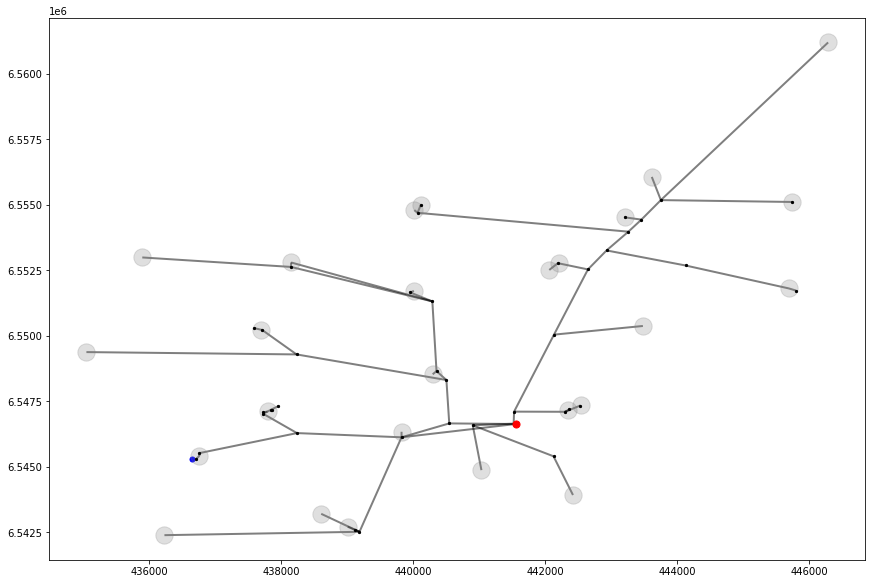

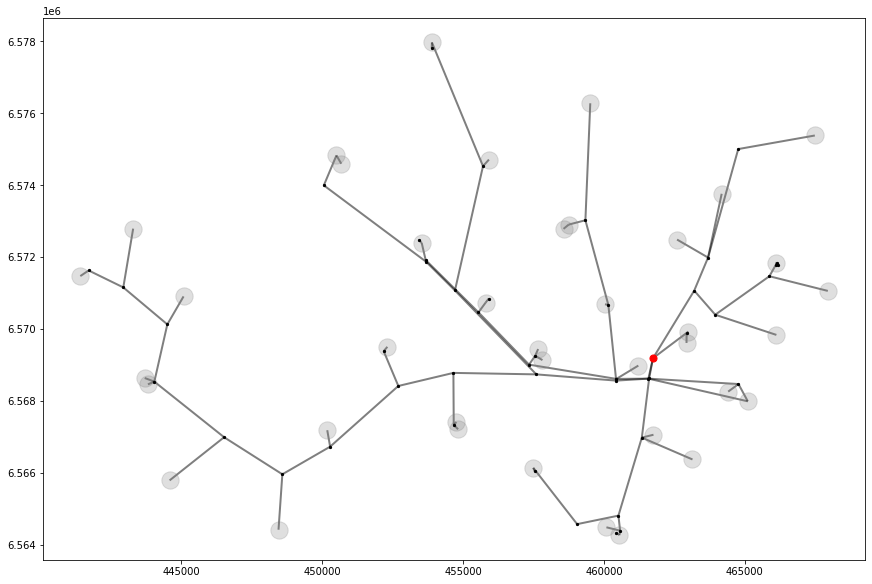

In [30]:
cmap=plt.get_cmap('tab20')
for rs_id in rs_ids:
    df = graph_df[graph_df.rs_schema_id == rs_id]
    df = df[["node_id_start", "node_id_end"]]
    df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(df)
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    ax = fig.add_subplot(1,1,1)
    g_nodes = set(G.nodes)
    nodelist = list(set(wells) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=25, node_color="blue", ax=ax)
    nodelist = list(set(pads) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=300, node_color="gray", alpha=0.25, ax=ax)
    nodelist = list(set(juncs) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=5, node_color="black", ax=ax)
    nodelist = list(set(kns) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=50, node_color="red", ax=ax)
    nx.draw_networkx_edges(G, sp, alpha=0.5, width=2, ax=ax)
    limits=plt.axis('on') # turns on axis
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    
plt.show()

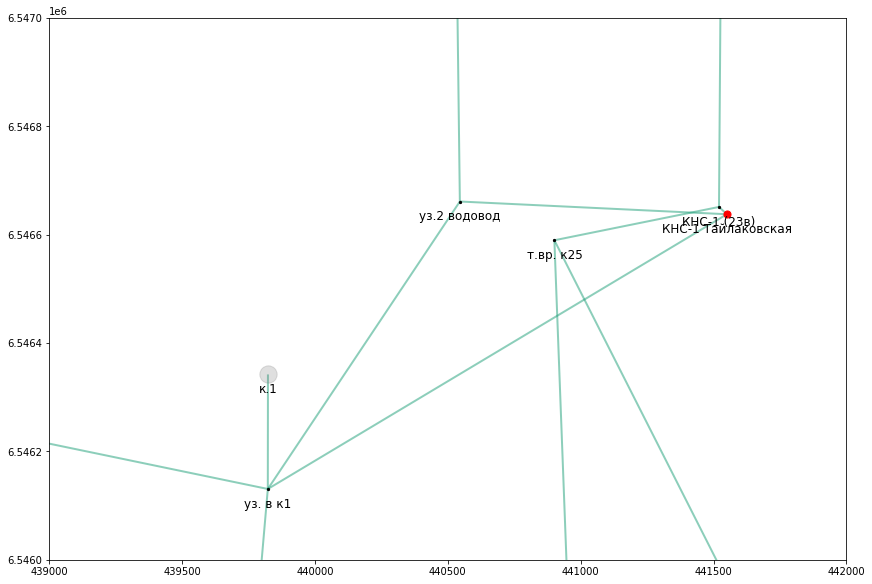

In [31]:
cmap=plt.get_cmap('Dark2').colors

fig = plt.figure(constrained_layout=True, figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for rs_id, clr in zip(rs_ids, cmap):
    df = graph_df[graph_df.rs_schema_id == rs_id]
    df = df[["node_id_start", "node_id_end"]]
    df.columns = ["source", "target"]
    G = nx.from_pandas_edgelist(df)
    g_nodes = set(G.nodes)    
    nodelist = list(set(wells) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=25, node_color="blue", ax=ax)
    nodelist = list(set(pads) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=300, node_color="gray", alpha=0.25, ax=ax)
    nodelist = list(set(juncs) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=5, node_color="black", ax=ax)
    nodelist = list(set(kns) & g_nodes)
    nx.draw_networkx_nodes(G, sp, nodelist=nodelist, node_size=50, node_color="red", ax=ax)
    nx.draw_networkx_edges(G, sp, alpha=0.5, width=2, ax=ax, edge_color=clr)
    
df = graph_df[["node_id_start", "node_id_end"]]
df.columns = ["source", "target"]
G = nx.from_pandas_edgelist(df)
lbls = {k : '\n\n'+node_labels[k] for k in pads}
lbls.update({k : '\n\n'+node_labels[k] for k in kns})
lbls.update({k : '\n\n'+node_labels[k] for k in juncs})
nx.draw_networkx_labels(G, sp, lbls, ax=ax)

df = graph_df[['part_id', 'node_id_start', 'node_id_end']]
edge_labels = dict(zip(zip(df.node_id_start, df.node_id_end), map(str, df.part_id)))
# nx.draw_networkx_edge_labels(G, pos=sp, edge_labels=edge_labels, font_size=9)

limits=plt.axis('on') # turns on axis
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlim(439000, 442000)
ax.set_ylim(6546000, 6547000)
# ax.set_xlim(435000, 445000)
# ax.set_ylim(6540000, 6560000)
plt.show()

In [32]:
for rs_id in rs_ids:
    df = graph_df[graph_df.rs_schema_id == rs_id]
    df = full_df[full_df.index.isin(df.index)]
    fn = f'..\\data\\rs_{rs_id}.csv'
    df.to_csv(fn)

In [33]:
df = nodes_df
df2 = df[df.type == 1]
df2['kind'] = 'Q'
df2['Q'] = np.random.uniform(0, 100, size = len(df2))
df2['is_source'] = False
df2['P'] = None

df1 = df[df.type == 8]
df1['kind'] = 'P'
df1['Q'] = None
df1['is_source'] = True
df1['P'] = 200

df = pd.concat([df1, df2])
fn = f'..\\data\\boundaries.csv'
df.to_csv(fn)

<ipython-input-33-808bce7a2f24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kind'] = 'Q'
<ipython-input-33-808bce7a2f24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Q'] = np.random.uniform(0, 100, size = len(df2))
<ipython-input-33-808bce7a2f24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [34]:
df_boundaries = df

In [35]:
df_b = df_boundaries
df_b['_q'] = df_b.Q.fillna(-100500)
df_b['_p'] = df_b.P.fillna(-100500)
df_b['value'] = df_b[["_q", "_p"]].max(axis=1)
df_b


,id,type,X,Y,name,H,kind,Q,is_source,P,_q,_p,value
11394,1750010931,8,441550.236490,6.546638e+06,КНС-1 Тайлаковская,86.90,P,None,True,200,-100500.000000,200,200.000000
11481,1750022767,8,461743.057104,6.569187e+06,КНС-2 Тайлаковская,79.70,P,None,True,200,-100500.000000,200,200.000000
11401,1750020918,1,445689.070000,6.551812e+06,к.27,74.00,Q,58.479,False,None,58.478950,-100500,58.478950
11403,1750033323,1,440114.250000,6.554996e+06,к.118,86.64,Q,4.03186,False,None,4.031860,-100500,4.031860
11407,1750034909,1,442533.760000,6.547347e+06,к.122,88.00,Q,51.911,False,None,51.911010,-100500,51.911010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11546,1750025776,1,450179.759832,6.567186e+06,к.68,65.10,Q,55.835,False,None,55.835005,-100500,55.835005
11547,1751058780,1,450678.040000,6.574595e+06,к.41 Б,97.22,Q,90.349,False,None,90.348979,-100500,90.348979
11548,1750040326,1,458567.608072,6.572784e+06,к.42 Б,86.00,Q,11.9242,False,None,11.924192,-100500,11.924192
11549,1750036786,1,443699.980000,6.568637e+06,к.56 Б,63.50,Q,27.8466,False,None,27.846596,-100500,27.846596


## Работа с телеметрией закачки

In [36]:
inj_filename = '..\\data\\zak.csv'
inj_df = pd.read_csv(inj_filename, parse_dates=['ValueDATE'], dayfirst=True)
inj_df

c:\users\pulk\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,OIS_ID,IDSKV,Mestor,kust,skv,ValueDATE,DVALUE,priz
0,1920006300,12000149,Тайлаковское,1,63,2020-11-09 01:15:00,212.1,P
1,1920006300,12000149,Тайлаковское,1,63,2020-11-09 01:17:00,212.2,P
2,1920006300,12000149,Тайлаковское,1,63,2020-11-09 01:17:00,212.1,P
3,1920006300,12000149,Тайлаковское,1,63,2020-11-09 01:17:00,212.2,P
4,1920006300,12000149,Тайлаковское,1,63,2020-11-09 01:18:00,212.1,P
...,...,...,...,...,...,...,...,...
786594,1920275500,15000202,Тайлаковское,8б,2755,2020-11-09 23:30:00,0.0,Q
786595,1920275500,15000202,Тайлаковское,8б,2755,2020-11-09 23:39:00,0.5,P
786596,1920275500,15000202,Тайлаковское,8б,2755,2020-11-09 23:44:00,0.0,Q
786597,1920275500,15000202,Тайлаковское,8б,2755,2020-11-09 23:59:00,0.5,P


In [37]:
inj_df.dtypes

OIS_ID                int64
IDSKV                 int64
Mestor               object
kust                 object
skv                  object
ValueDATE    datetime64[ns]
DVALUE              float64
priz                 object
dtype: object

In [38]:
def try_to_make_it_int(x):
    try:
        return int(x.strip())
    except:
        return x

In [39]:
inj_df['kust'] = inj_df.kust.apply(try_to_make_it_int)

## Дальше несколько ячеек бесплодной попытки воспользоваться таблицей oms__ids

In [40]:
conn = Connector(host="192.168.4.65", port='80', user="admin", password="12345678")
query = '| readFile format=parquet path=oms__ids'
job = conn.jobs.create(query_text=query, cache_ttl=60, tws=0, twf=0)
print(job.status)
res = job.dataset.load()
df_ids = pd.DataFrame(res)
df_ids.columns


success


Index(['IDOis', 'IDMestor', 'IDPad', 'padNum', 'IDGzu', 'IDWell', 'wellNum',
       'IDWellNag', 'IDVrb', 'IDPlast', 'IDBaspro', 'DNS', 'IDPadNode',
       'pipePadNum', 'IDWellNode', 'pipeWellNum', 'IDKs'],
      dtype='object')

In [41]:
df_ids.dtypes

IDOis          object
IDMestor       object
IDPad          object
padNum         object
IDGzu          object
IDWell         object
wellNum        object
IDWellNag      object
IDVrb          object
IDPlast        object
IDBaspro       object
DNS            object
IDPadNode      object
pipePadNum     object
IDWellNode     object
pipeWellNum    object
IDKs           object
dtype: object

In [42]:
df = df_ids[['IDMestor', 'padNum', 'IDPadNode']]
df = df.drop_duplicates()
df = df.sort_values(by = ['IDMestor', 'padNum', 'IDPadNode'])
# df.head(60)
df = df_ids[(df_ids.IDPadNode=='1750010937')|(df_ids.IDPadNode=='1750010938')]
df

,IDOis,IDMestor,IDPad,padNum,IDGzu,IDWell,wellNum,IDWellNag,IDVrb,IDPlast,IDBaspro,DNS,IDPadNode,pipePadNum,IDWellNode,pipeWellNum,IDKs
61,1920005600,13,12000002,1,12000137,12000019,56,0,0,PL0834::13,7120000056,ДНС 1,1750010938,1,1750011931,56,12002302
73,1920005300,13,12000002,1,12000078,12000010,53,0,0,PL0078::13,7120000053,ДНС 1,1750010938,1,1750011107,53,12002325
74,1920008300,13,12000002,1,0,0,83,12000003,12000002,PL0078::13,7120000083,ДНС 1,1750010938,1,1751056481,83,NaN
84,1920000204,13,12000002,1,0,0,2в,12000262,0,PL0092::13,712000002В,NaN,1750010938,1,1750012843,2в,NaN
85,1920000302,13,12000002,1,0,12000160,3в,0,0,PL0092::13,0,NaN,1750010938,1,1751056248,3вб,12002347
115,1920006600,13,12000002,1,12000137,12000016,66,0,0,PL0078::13,7120000066,ДНС 1,1750010938,1,1750012491,66,12002592
216,1920006100,13,12000002,1,12000078,12000009,61,0,0,PL0834::13,7120000061,ДНС 1,1750010938,1,1750011106,61,12002955
262,1920008500,13,12000002,1,12000137,12000018,85,0,0,PL0834::13,7120000085,ДНС 1,1750010938,1,1750012600,85,12002681
268,1920008400,13,12000002,1,12000078,12000012,84,0,0,PL0078::13,7120000084,ДНС 1,1750010938,1,1750011395,84,12002079
357,1920007400,13,12000002,1,12000137,12000015,74,0,0,PL0078::13,7120000074,ДНС 1,1750010938,1,1750012151,74,12002406


In [43]:
df_id2 = df_ids[['IDOis', 'IDPadNode']].dropna()
df_id2['IDOis'] = df_id2.IDOis.apply(str.strip)
df_id2['IDPadNode'] = df_id2.IDPadNode.apply(str.strip)
df_id2['IDOis'] = df_id2.IDOis.apply(int)
df_id2['IDPadNode'] = df_id2.IDPadNode.apply(int)
df_id2.columns = ['OIS_ID', 'IDPadNode']
len(df_ids.padNum.unique())
# df = pd.merge(inj_df, df_id2, how = 'left')
# df

81

## Теперь попытаюсь связать кусты с айдишниками руками

In [44]:
df = inj_df[inj_df.priz == 'Q']
df = df.groupby(['kust', 'IDSKV'], as_index = False).agg({'DVALUE':np.mean})
# df = df.groupby(['kust'], as_index = False).agg({'DVALUE':sum, 'IDSKV':max})
df.columns = ['pad', 'well_id', 'Q']
df_Q = df
df_Q


,pad,well_id,Q
0,1,12000003,0.000000
1,1,12000004,148.918182
2,1,12000005,0.500000
3,1,12000149,0.000000
4,1,12000157,0.000000
...,...,...,...
333,40б,12000281,21.164835
334,62б,15000213,26.676923
335,6б,15000140,0.000000
336,6б,15000142,18.304000


In [45]:
df = inj_df[inj_df.priz == 'P']
df = df.groupby(['kust', 'IDSKV'], as_index = False).agg({'DVALUE':np.mean})
df.columns = ['pad', 'well_id', 'P']
df_P = df
df_P

,pad,well_id,P
0,1,12000003,187.045613
1,1,12000004,187.045613
2,1,12000149,187.045613
3,1,12000157,187.045613
4,1,12000197,187.045613
...,...,...,...
319,40б,12000281,200.333333
320,62б,15000213,171.193472
321,6б,15000140,185.310417
322,6б,15000142,185.310417


In [46]:
df_PQ = pd.merge(df_P, df_Q, how = 'outer')
df_PQ

,pad,well_id,P,Q
0,1,12000003,187.045613,0.000000
1,1,12000004,187.045613,148.918182
2,1,12000149,187.045613,0.000000
3,1,12000157,187.045613,0.000000
4,1,12000197,187.045613,208.352000
...,...,...,...,...
340,49,15000167,NaN,14.977083
341,60,15000175,NaN,3.666667
342,69,15000195,NaN,0.000000
343,88,12000277,NaN,0.000000


In [47]:
df_PQ[df_PQ['pad']==88]

,pad,well_id,P,Q
288,88,12000254,193.555319,116.754639
289,88,12000257,193.555319,89.568041
290,88,12000260,193.555319,108.976000
291,88,12000264,193.555319,192.354639
292,88,12000268,193.555319,0.000000
293,88,12000272,193.555319,240.287629
343,88,12000277,NaN,0.000000
344,88,12000280,NaN,0.000000


In [48]:
df_PQ2 = df_PQ.groupby(['pad'], as_index = False).agg({'P':np.mean, 'Q':sum})
df_PQ2.loc[24, 'Q'] = df_PQ2.loc[24, 'Q'] / 1000
df_PQ2['name'] = 'к.' + df_PQ2['pad'].apply(str).apply(str.upper)
for n in ['к.23Б', 'к.40Б', 'к.62Б', 'к.6Б', 'к.8Б']:
    mask = df_PQ2.name==n
    df_PQ2.loc[mask, 'name'] = n[:-1]+' '+n[-1]
df_PQ2

,pad,P,Q,name
0,1,187.045613,1628.608719,к.1
1,2,172.797569,1483.870049,к.2
2,3,184.805505,80.666683,к.3
3,4,186.888363,423.077624,к.4
4,5,169.443696,529.766667,к.5
...,...,...,...,...
65,23б,181.693307,589.191034,к.23 Б
66,40б,200.180229,257.736031,к.40 Б
67,62б,171.193472,26.676923,к.62 Б
68,6б,185.310417,18.304000,к.6 Б


In [49]:
df_boundaries

,id,type,X,Y,name,H,kind,Q,is_source,P,_q,_p,value
11394,1750010931,8,441550.236490,6.546638e+06,КНС-1 Тайлаковская,86.90,P,None,True,200,-100500.000000,200,200.000000
11481,1750022767,8,461743.057104,6.569187e+06,КНС-2 Тайлаковская,79.70,P,None,True,200,-100500.000000,200,200.000000
11401,1750020918,1,445689.070000,6.551812e+06,к.27,74.00,Q,58.479,False,None,58.478950,-100500,58.478950
11403,1750033323,1,440114.250000,6.554996e+06,к.118,86.64,Q,4.03186,False,None,4.031860,-100500,4.031860
11407,1750034909,1,442533.760000,6.547347e+06,к.122,88.00,Q,51.911,False,None,51.911010,-100500,51.911010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11546,1750025776,1,450179.759832,6.567186e+06,к.68,65.10,Q,55.835,False,None,55.835005,-100500,55.835005
11547,1751058780,1,450678.040000,6.574595e+06,к.41 Б,97.22,Q,90.349,False,None,90.348979,-100500,90.348979
11548,1750040326,1,458567.608072,6.572784e+06,к.42 Б,86.00,Q,11.9242,False,None,11.924192,-100500,11.924192
11549,1750036786,1,443699.980000,6.568637e+06,к.56 Б,63.50,Q,27.8466,False,None,27.846596,-100500,27.846596


In [50]:
df1 = df_PQ2[['name', 'pad']]
df2 = df_boundaries[['name', 'id']]
df = pd.merge(df1, df2, how='outer')
df[df['pad'].isna()|df['id'].isna()]
# df2 = df2.sort_values(['name'])
# df2['name'].head(60)


,name,pad,id
30,к.37,37,NaN
32,к.39,39,NaN
33,к.40,40,NaN
36,к.43,43,NaN
37,к.45,45,NaN
41,к.55,55,NaN
44,к.59,59,NaN
52,к.71,71,NaN
58,к.88,88,NaN
61,к.96,96,NaN
